In [2]:
import sklearn
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_fwf(r'C:\Users\harr1\Desktop\Thinkful\yelp_labelled.txt')
df.columns = ['message', 'none', 'none_2']
df['positive'] = df.message.str[-1]
print (df.head(10))

                                             message none none_2 positive
0                              Crust is not good.\t0  NaN    NaN        0
1       Not tasty and the texture was just nasty.\t0  NaN    NaN        0
2  Stopped by during the late May bank holiday of...  NaN    NaN        1
3  The selection on the menu was great and so wer...  NaN    NaN        1
4  Now I am getting angry and I want my damn pho.\t0  NaN    NaN        0
5           Honeslty it didn't taste THAT fresh.)\t0  NaN    NaN        0
6  The potatoes were like rubber and you could te...  NaN    NaN        0
7                       The fries were great too.\t1  NaN    NaN        1
8                                  A great touch.\t1  NaN    NaN        1
9                        Service was very prompt.\t1  NaN    NaN        1


In [4]:
keywords = ['excellent', 'tasty', 'love', 'favorite', 'exceptional', 'great', 'good']

for each in keywords:
    df[str(each)] = df.message.str.contains(' ' + str(each) + ' ',
                                           case = False)

In [5]:
df['positive'] = (df['positive']=='1')

In [6]:
print (df.head(10))

                                             message none none_2  positive  \
0                              Crust is not good.\t0  NaN    NaN     False   
1       Not tasty and the texture was just nasty.\t0  NaN    NaN     False   
2  Stopped by during the late May bank holiday of...  NaN    NaN      True   
3  The selection on the menu was great and so wer...  NaN    NaN      True   
4  Now I am getting angry and I want my damn pho.\t0  NaN    NaN     False   
5           Honeslty it didn't taste THAT fresh.)\t0  NaN    NaN     False   
6  The potatoes were like rubber and you could te...  NaN    NaN     False   
7                       The fries were great too.\t1  NaN    NaN      True   
8                                  A great touch.\t1  NaN    NaN      True   
9                        Service was very prompt.\t1  NaN    NaN      True   

   excellent  tasty   love  favorite  exceptional  great   good  
0      False  False  False     False        False  False  False  
1      Fa

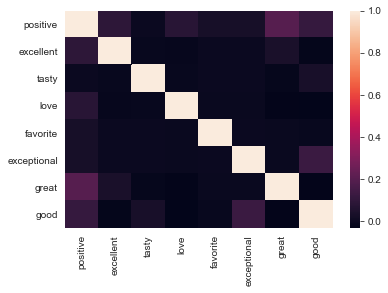

In [7]:
sns.set_style('white')
sns.heatmap(df.corr())

In [8]:
data = df[keywords]
target = df['positive']

In [9]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(data, target)

y_pred = model.predict(data)

print("Total: {}, Mislabeled: {}".format(
    data.shape[0], 
    (target != y_pred).sum()
))

Total: 999, Mislabeled: 412


In [12]:
print(((1-(target != y_pred).sum()/data.shape[0]))*100)

58.75875875875876
